# Trajectory Classification with Deep Learning

### Goal: 
Given $M$ trajectories generated from $c=3$ (generally, any finite number of) stochastic models, labeled as Model 0, Model 1 and Model 2 (to be described below), together with their labels (0,1 and 2) corresponding to the generating model, the task is to learn and predict the label of a trajectory (which a priori belongs to one of the three models). This is a first goal towards a more general problem to be tackled in the future.

### Tools: 
Deep neural networks -- we use a simple feed-forward neural network as an initial experiment with the problem. 

### Description of the models (categories):
Model 0: Passive Brownian motion in a harmonic trap (i.e. a O-U process driven by a Gaussian white noise)

Model 1: Passive Brownian motion in a harmonic trap, with inclusion of a non-Gaussian noise which is a nonlinear functional of the Wiener process

Model 2: Passive Brownian motion in a harmonic trap, with inclusion of a Gaussian noise which is an O-U process

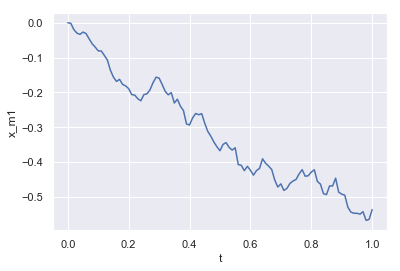

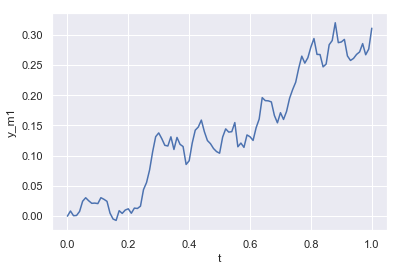

In [1]:
#Using SDEint library: https://pypi.org/project/sdeint/
#Generate synthetic data from each of the three models

import numpy as np
import matplotlib.pyplot as plt
import sdeint
import math
np.random.seed(100)

# To display plots directly in the notebook:
%matplotlib inline

import pandas as pd
import seaborn as sns
from scipy import stats
sns.set(color_codes=True)

#universal parameters for all models
D_T=0.01
k=0.5

#number of simulations/training trajs for each model
M=1000


##########################################
#model-specific parameters
#Active BM -- self-propelled, +non-Gaussian noise
v0=np.random.uniform(0.5,1,1)
D_R=np.random.uniform(0.1,0.2,1)

#drift and noise coefficient
def f(x,t):
    f0=v0*np.cos(x[2])-k*x[0] 
    f1=v0*np.sin(x[2])-k*x[1]
    f2=0
    return np.array([f0,f1,f2])
    
def g(x,t):
    g0=np.sqrt(2*D_T)
    g1=g0
    g2=np.sqrt(2*D_R)
    return np.array([g0, g1, g2]).reshape((3,1))

#initial conditions
x0=0.0; x1=0.0; x2=np.random.uniform(0,2*math.pi,1)

T=1; N=100; dt=T/N 
t=np.linspace(0,T,N+1) #vector of N dims
xzero = np.array([x0, x1, x2])

x_m1 = [sdeint.itoint(f, g, xzero, t) for _ in range(M)]
x_m1 = np.array(x_m1)

plt.plot(t, x_m1[0,:,0])
plt.xlabel('t')
plt.ylabel('x_m1')
plt.show()
plt.plot(t,x_m1[0,:,1])
plt.xlabel('t')
plt.ylabel('y_m1')
plt.show()

np.savetxt('trajx_m1.csv', np.c_[np.insert(x_m1[:,:,0], N+1, 1, axis=1)], delimiter=',')    #save M number of x-variable trajectories over N+1 discretized grids
np.savetxt('trajy_m1.csv', np.c_[np.insert(x_m1[:,:,1], N+1, 1, axis=1)], delimiter=',')    #save M number of y-variable trajectories over N+1 discretized grids


#for i in range(5):
#    sns.distplot(x_m1[:,i*200-1,0],hist=False,label=(i*200)*dt);
#plt.legend()
#plt.xlabel('x_m1')
#plt.title('How distribution of x_m1 changes with t')
#plt.show()

In [24]:
#print(np.shape(x_m1[:,:,0])) #M=1000 x-trajs, each discretized with N+1=1001 grids

(1000, 101)


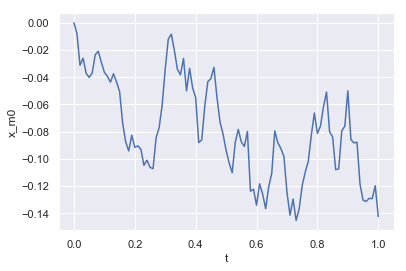

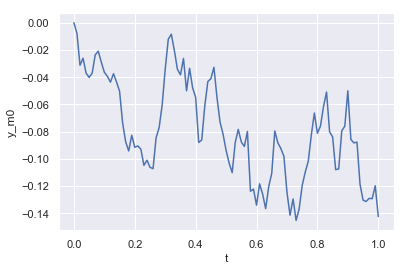

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import sdeint
import math
np.random.seed(100)

import pandas as pd
import seaborn as sns
from scipy import stats
sns.set(color_codes=True)

#universal parameters for all models
D_T=0.01
k=0.5

#number of simulations/training trajs for each model
M=1000

#model-specific parameters
#Passive BM -- zero additional noise
v0=0.0
D_R=0.01

#drift and noise coefficient
def f(x,t):
    f0=v0*np.cos(x[2])-k*x[0] 
    f1=v0*np.sin(x[2])-k*x[1]
    f2=0
    return np.array([f0,f1,f2])
    
def g(x,t):
    g0=np.sqrt(2*D_T)
    g1=g0
    g2=np.sqrt(2*D_R)
    return np.array([g0, g1, g2]).reshape((3,1))

#initial conditions
x0=0.0; x1=0.0; x2=np.random.uniform(0,2*math.pi,1)

T=1; N=100; dt=T/N 
t=np.linspace(0,T,N+1) #vector of N dims
xzero = np.array([x0, x1, x2])

x_m0 = [sdeint.itoint(f, g, xzero, t) for _ in range(M)]
x_m0 = np.array(x_m0)

plt.plot(t, x_m0[0,:,0])
plt.xlabel('t')
plt.ylabel('x_m0')
plt.show()
plt.plot(t,x_m0[0,:,1])
plt.xlabel('t')
plt.ylabel('y_m0')
plt.show()

np.savetxt('trajx_m0.csv', np.c_[np.insert(x_m0[:,:,0], N+1, 0, axis=1)], delimiter=',')    #save M number of x-variable trajectories over N+1 discretized grids
np.savetxt('trajy_m0.csv', np.c_[np.insert(x_m0[:,:,1], N+1, 0, axis=1)], delimiter=',')    #save M number of y-variable trajectories over N+1 discretized grids


#for i in range(5):
#    sns.distplot(x_m0[:,i*200-1,0],hist=False,label=(i*200)*dt);
#plt.legend()
#plt.xlabel('x_m0')
#plt.title('How distribution of x_m0 changes with t')
#plt.show()

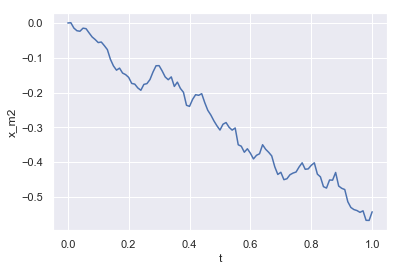

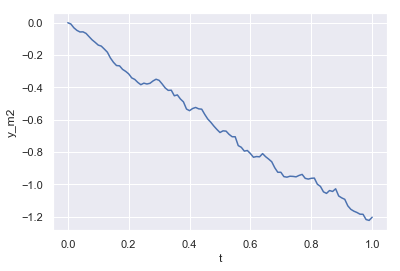

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import sdeint
import math
np.random.seed(100)

import pandas as pd
import seaborn as sns
from scipy import stats
sns.set(color_codes=True)

#universal parameters for all models
D_T=0.01
k=0.5

#number of simulations/training trajs for each model
M=1000

#model-specific parameters
#Active OUP --- +(indep) OU process
v0=np.random.uniform(0.5,1,1)
alpha=0.1 #np.random.uniform(0.1,0.2,1)
D_A=alpha
#np.random.uniform(0.1,0.2,1)

#drift and noise coefficient
def f(x,t):
    f0=v0*x[2]-k*x[0] 
    f1=v0*x[3]-k*x[1]
    f2=-alpha*x[2]
    f3=f2
    return np.array([f0,f1,f2,f3])
    
def g(x,t):
    g0=np.sqrt(2*D_T)
    g1=g0
    g2=np.sqrt(2*D_A)
    g3=g2
    return np.array([g0, g1, g2, g3]).reshape((4,1))

#initial conditions
x0=0.0; x1=0.0; x2=np.sqrt(D_A/alpha)*np.random.randn(); x3=np.sqrt(D_A/alpha)*np.random.randn() 

T=1; N=100; dt=T/N 
t=np.linspace(0,T,N+1) #vector of N dims
xzero = np.array([x0, x1, x2, x3])

x_m2 = [sdeint.itoint(f, g, xzero, t) for _ in range(M)]
x_m2 = np.array(x_m2)

plt.plot(t, x_m2[0,:,0])
plt.xlabel('t')
plt.ylabel('x_m2')
plt.show()
plt.plot(t,x_m2[0,:,1])
plt.xlabel('t')
plt.ylabel('y_m2')
plt.show()

np.savetxt('trajx_m2.csv', np.c_[np.insert(x_m2[:,:,0], N+1, 2, axis=1)], delimiter=',')    #save M number of x-variable trajectories over N+1 discretized grids
np.savetxt('trajy_m2.csv', np.c_[np.insert(x_m2[:,:,1], N+1, 2, axis=1)], delimiter=',')    #save M number of y-variable trajectories over N+1 discretized grids

#for i in range(5):
#    sns.distplot(x_m2[:,i*200-1,0],hist=False,label=(i*200)*dt);
#plt.legend()
#plt.xlabel('x_m2')
#plt.title('How distribution of x_m2 changes with t')
#plt.show()

In [ ]:
#print(np.shape(x_m2))